# Proyecto 1 - Juan Luis Baldelomar Cabrera

In [1]:
import pandas
import numpy as np

from nltk import TweetTokenizer
from nltk.corpus import stopwords

from nltk.probability import FreqDist

# Load Data

In [2]:
import pandas
xls = pandas.ExcelFile('Opiniones Tripadvisor_nlp2022.xlsx')
ds1, ds1_name = pandas.read_excel(xls, 'BasilicaColegiata'), 'Basilica Colegiata'
ds2, ds2_name = pandas.read_excel(xls, 'MercadoHidalgo'),    'Mercado Hidalgo'
ds3, ds3_name = pandas.read_excel(xls, 'CasaDiegoRivera'),   'Casa de Diego Rivera'
ds4, ds4_name = pandas.read_excel(xls, 'UG'),                'Universidad de Guanajuato'
ds5, ds5_name = pandas.read_excel(xls, 'Alhondiga'),         'Alhondiga'
ds6, ds6_name = pandas.read_excel(xls, 'TeatroJuarez'),      'Teatro Juarez'
ds7, ds7_name = pandas.read_excel(xls, 'JardinUnion'),       'Jardin Union'
ds8, ds8_name = pandas.read_excel(xls, 'CallejonBeso'),      'Callejon del Beso'
ds9, ds9_name = pandas.read_excel(xls, 'Pipila'),            'Monumento al Pipila'
ds10, ds10_name = pandas.read_excel(xls, 'MuseoMomias'),     'Museo de las Momias'

In [4]:
ds1

Género  Edad Nacional ó Internacional Calificación  Escala  \
0     Femenino  64.0            Internacional    Muy bueno       4   
1    Masculino  59.0            Internacional    Excelente       5   
2     Femenino  26.0            Internacional    Excelente       5   
3    Masculino  50.0            Internacional    Excelente       5   
4     Femenino  55.0            Internacional      Regular       3   
..         ...   ...                      ...          ...     ...   
555   Femenino  43.0                 Nacional    Muy bueno       4   
556  Masculino  38.0            Internacional    Excelente       5   
557   Femenino  23.0                 Nacional    Excelente       5   
558   Femenino  49.0                 Nacional    Excelente       5   
559  Masculino  65.0                 Nacional    Excelente       5   

     Número de aportaciones  \
0                       175   
1                       306   
2                       106   
3                        62   
4                        59   
..                      ...   
555                      12   
556                      11   
557                       2   
558                      60   
559                      22   

                                  Título de la opinión  \
0                                      "Punto central"   
1    "The most important church in this colonial to...   
2                "Y uno de los símbolos de Guanajuato"   
3                           "Beautiful and a must see"   
4                                               "Nice"   
..                                                 ...   
555                                  "Hermosa iglesia"   
556                                       "Historical"   
557         "Basílica de Nuestra Señora de Guanajuato"   
558                                 "Beautiful Church"   
559                          "Stop by & take a peek:)"   

                                               Opinión            País  \
0    "Basílica muy bien conservada, punto central e...        Colombia   
1    "The Basilica (Guanajuato does not have a Cath...        Colombia   
2    "Edificio de la iglesia amarilla es un abigarr...   Corea del Sur   
3    "A must see place in town and very nice to go ...  Estados Unidos   
4    "Not particularly impressive, but if you like ...  Estados Unidos   
..                                                 ...             ...   
555  "Es un sitio lleno de contrastes. Fuera del te...          México   
556  "I walked into the Basilica and felt suddenly ...          Canadá   
557  "Un lugar al buen estilo barroco, puedes admir...          México   
558  "The inside of this Church in Plaza la Paz, is...          México   
559  "There is a gold organ in the loft. The entire...          México   

      Idioma Dispositivo      Fecha  
0    Español       Móvil 2018-05-13  
1     Inglés          PC 2018-05-08  
2    Coreano          PC 2018-05-05  
3     Inglés          PC 2018-05-01  
4     Inglés          PC 2018-04-29  
..       ...         ...        ...  
555  Español          PC 2011-12-03  
556   Inglés          PC 2011-09-17  
557  Español          PC 2011-09-11  
558   Inglés          PC 2011-09-02  
559   Inglés          PC 2011-04-03  

[560 rows x 12 columns]

In [3]:
datasets = [ds1, ds2, ds3, ds4, ds5, ds6, ds7, ds8, ds9, ds10]
ds_names = [ds1_name, ds2_name, ds3_name, ds4_name, ds5_name, ds6_name, ds7_name, ds8_name, ds9_name, ds10_name]

# Utilities

## String Functions and Dummy Function

In [5]:
def bold_string(string):
    return '\033[1m' + string + '\033[0m '

def dummy(doc):
    return doc

## Process Documents and Get Vocabulary by Hand 

In [138]:
from nltk import TweetTokenizer
from nltk.corpus import stopwords

def process_documents(documents, tokenize=True):
    docs = []
    tokenizer = TweetTokenizer()
    for doc in documents:
        if tokenize:
            docs.append(tokenizer.tokenize(doc.lower().replace('\"','')))
        else:
            docs.append(doc.lower().replace('\"',''))
        
    return docs

def get_vocabulary(docs, size=-1):
    tokens = [word for doc in docs for word in doc]
    voc = FreqDist(tokens).most_common(size) if size!= -1 else FreqDist(tokens).most_common()
    voc_dict = {}
    for i, (word, _) in enumerate(voc):
        voc_dict[word] = i
        
    return voc_dict

## BoW and Feature Reduction Functions

In [134]:
from sklearn.feature_extraction.text import CountVectorizer as bow_builder
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_selection import SelectKBest, chi2 
from sklearn.preprocessing import LabelBinarizer


def chi_sqr(tf_matrix, labels):
    Nt = len(tf_matrix)
    bin_labels = LabelBinarizer().fit_transform(labels)
    bin_labels = [bin_labels[:, i][:,np.newaxis] for i in range(bin_labels.shape[1])] 

    n_i = np.sum(tf_matrix>0, axis=0)
    n_ic = np.array([np.sum((tf_matrix * bin_label)>0, axis=0) for bin_label in bin_labels])
    n_c = np.array([np.sum(bin_label) for bin_label in bin_labels])[:, np.newaxis]
    chi_c = Nt*(Nt * n_ic - n_c * n_i)**2/(n_c * n_i * (Nt - n_c) * (Nt - n_i))
    
    return chi_c

def reduce_dims(bow, voc, labels, n, label_pos):
    # compute chi avg
    chi = chi_sqr(bow, labels)
    new_dict = {}
    n_max_chi = np.flip(np.argsort(chi[label_pos]))[:n]
    
    for i, index in enumerate(n_max_chi):
        word = voc[index]
        new_dict[word] = i
        
    chi_pos = chi[label_pos][n_max_chi]
    return new_dict, chi_pos


def get_bow(documents, T=10000, transform=True, use_idf=True, vocabulary=None, sw=None):
    bow_b = bow_builder(max_features=T, vocabulary=vocabulary, binary=False, stop_words=sw)
    tfidf = TfidfTransformer(use_idf=use_idf)
    
    bow = bow_b.fit_transform(documents) if vocabulary == None else bow_b.transform(documents)
    if transform:
        bow = tfidf.fit_transform(bow)
        
    return bow, bow_b.get_feature_names_out()

def get_features_by_hand(documents, labels, label_pos, n, T=10000, sw=None):
    bow, voc = get_bow(documents, T=T, transform=False, use_idf=False, sw=sw)
    return reduce_dims(bow.toarray(), voc, labels, n, label_pos)
    
def get_features(documents, labels, n, T=10000, transform=True, use_idf=True, vocabulary=None, sw=None):
    bow, features = get_bow(documents, T=T, transform=transform, use_idf=use_idf, vocabulary=vocabulary, sw=sw)
    discriminator = SelectKBest(chi2, k=n)
    X = discriminator.fit_transform(bow, labels)
    scores = discriminator.scores_
    support = discriminator.get_support(indices=True)
    
    features = discriminator.get_feature_names_out(features)
    
    return X, scores[support], features

# 1. Estadísticas

## Promedio de Puntuación

In [43]:
for ds, name in zip(datasets, ds_names):
    scores = np.array(list(map(int, ds['Escala'])))
    print('{0:40} puntuación media: {1:.2f} \t std dev: {2:.2f}'.format(bold_string(name), np.mean(scores), np.std(scores)))

Basilica Colegiata               puntuación media: 4.50 	 std dev: 0.67
Mercado Hidalgo                  puntuación media: 3.95 	 std dev: 0.95
Casa de Diego Rivera             puntuación media: 4.24 	 std dev: 0.80
Universidad de Guanajuato        puntuación media: 4.60 	 std dev: 0.61
Alhondiga                        puntuación media: 4.45 	 std dev: 0.75
Teatro Juarez                    puntuación media: 4.70 	 std dev: 0.52
Jardin Union                     puntuación media: 4.59 	 std dev: 0.61
Callejon del Beso                puntuación media: 4.00 	 std dev: 0.97
Monumento al Pipila              puntuación media: 4.38 	 std dev: 0.77
Museo de las Momias              puntuación media: 3.68 	 std dev: 1.14


## Longitud Promedio de Comentarios

In [143]:
for ds, name in zip(datasets, ds_names):
    opinions = list(ds['Opinión'])
    opinions = process_documents(opinions)
    opinion_nWords = np.array([len(opinion) for opinion in opinions])
    print('{0:40} longitud media de opiniones: {1:.2f} \t std dev: {2:.2f}'.format(bold_string(name), np.mean(opinion_nWords), np.std(opinion_nWords)))

Basilica Colegiata               longitud media de opiniones: 44.31 	 std dev: 32.48
Mercado Hidalgo                  longitud media de opiniones: 51.62 	 std dev: 37.96
Casa de Diego Rivera             longitud media de opiniones: 54.73 	 std dev: 33.51
Universidad de Guanajuato        longitud media de opiniones: 39.44 	 std dev: 22.18
Alhondiga                        longitud media de opiniones: 51.53 	 std dev: 37.29
Teatro Juarez                    longitud media de opiniones: 46.43 	 std dev: 29.84
Jardin Union                     longitud media de opiniones: 48.76 	 std dev: 41.60
Callejon del Beso                longitud media de opiniones: 50.34 	 std dev: 36.20
Monumento al Pipila              longitud media de opiniones: 52.78 	 std dev: 40.04
Museo de las Momias              longitud media de opiniones: 65.07 	 std dev: 51.82


## Promedio de Edades

In [42]:
for ds, name in zip(datasets, ds_names):
    scores = np.array(list(map(float, ds['Edad'])))
    print('{0:40} edad media: {1:.2f} \t std dev: {2:.2f}'.format(bold_string(name), np.nanmean(scores), np.nanstd(scores)))

Basilica Colegiata               edad media: 41.87 	 std dev: 14.82
Mercado Hidalgo                  edad media: 40.69 	 std dev: 15.07
Casa de Diego Rivera             edad media: 44.35 	 std dev: 15.11
Universidad de Guanajuato        edad media: 39.31 	 std dev: 13.92
Alhondiga                        edad media: 40.71 	 std dev: 13.34
Teatro Juarez                    edad media: 41.75 	 std dev: 13.81
Jardin Union                     edad media: 41.39 	 std dev: 14.88
Callejon del Beso                edad media: 38.83 	 std dev: 13.33
Monumento al Pipila              edad media: 38.44 	 std dev: 13.05
Museo de las Momias              edad media: 38.96 	 std dev: 12.88


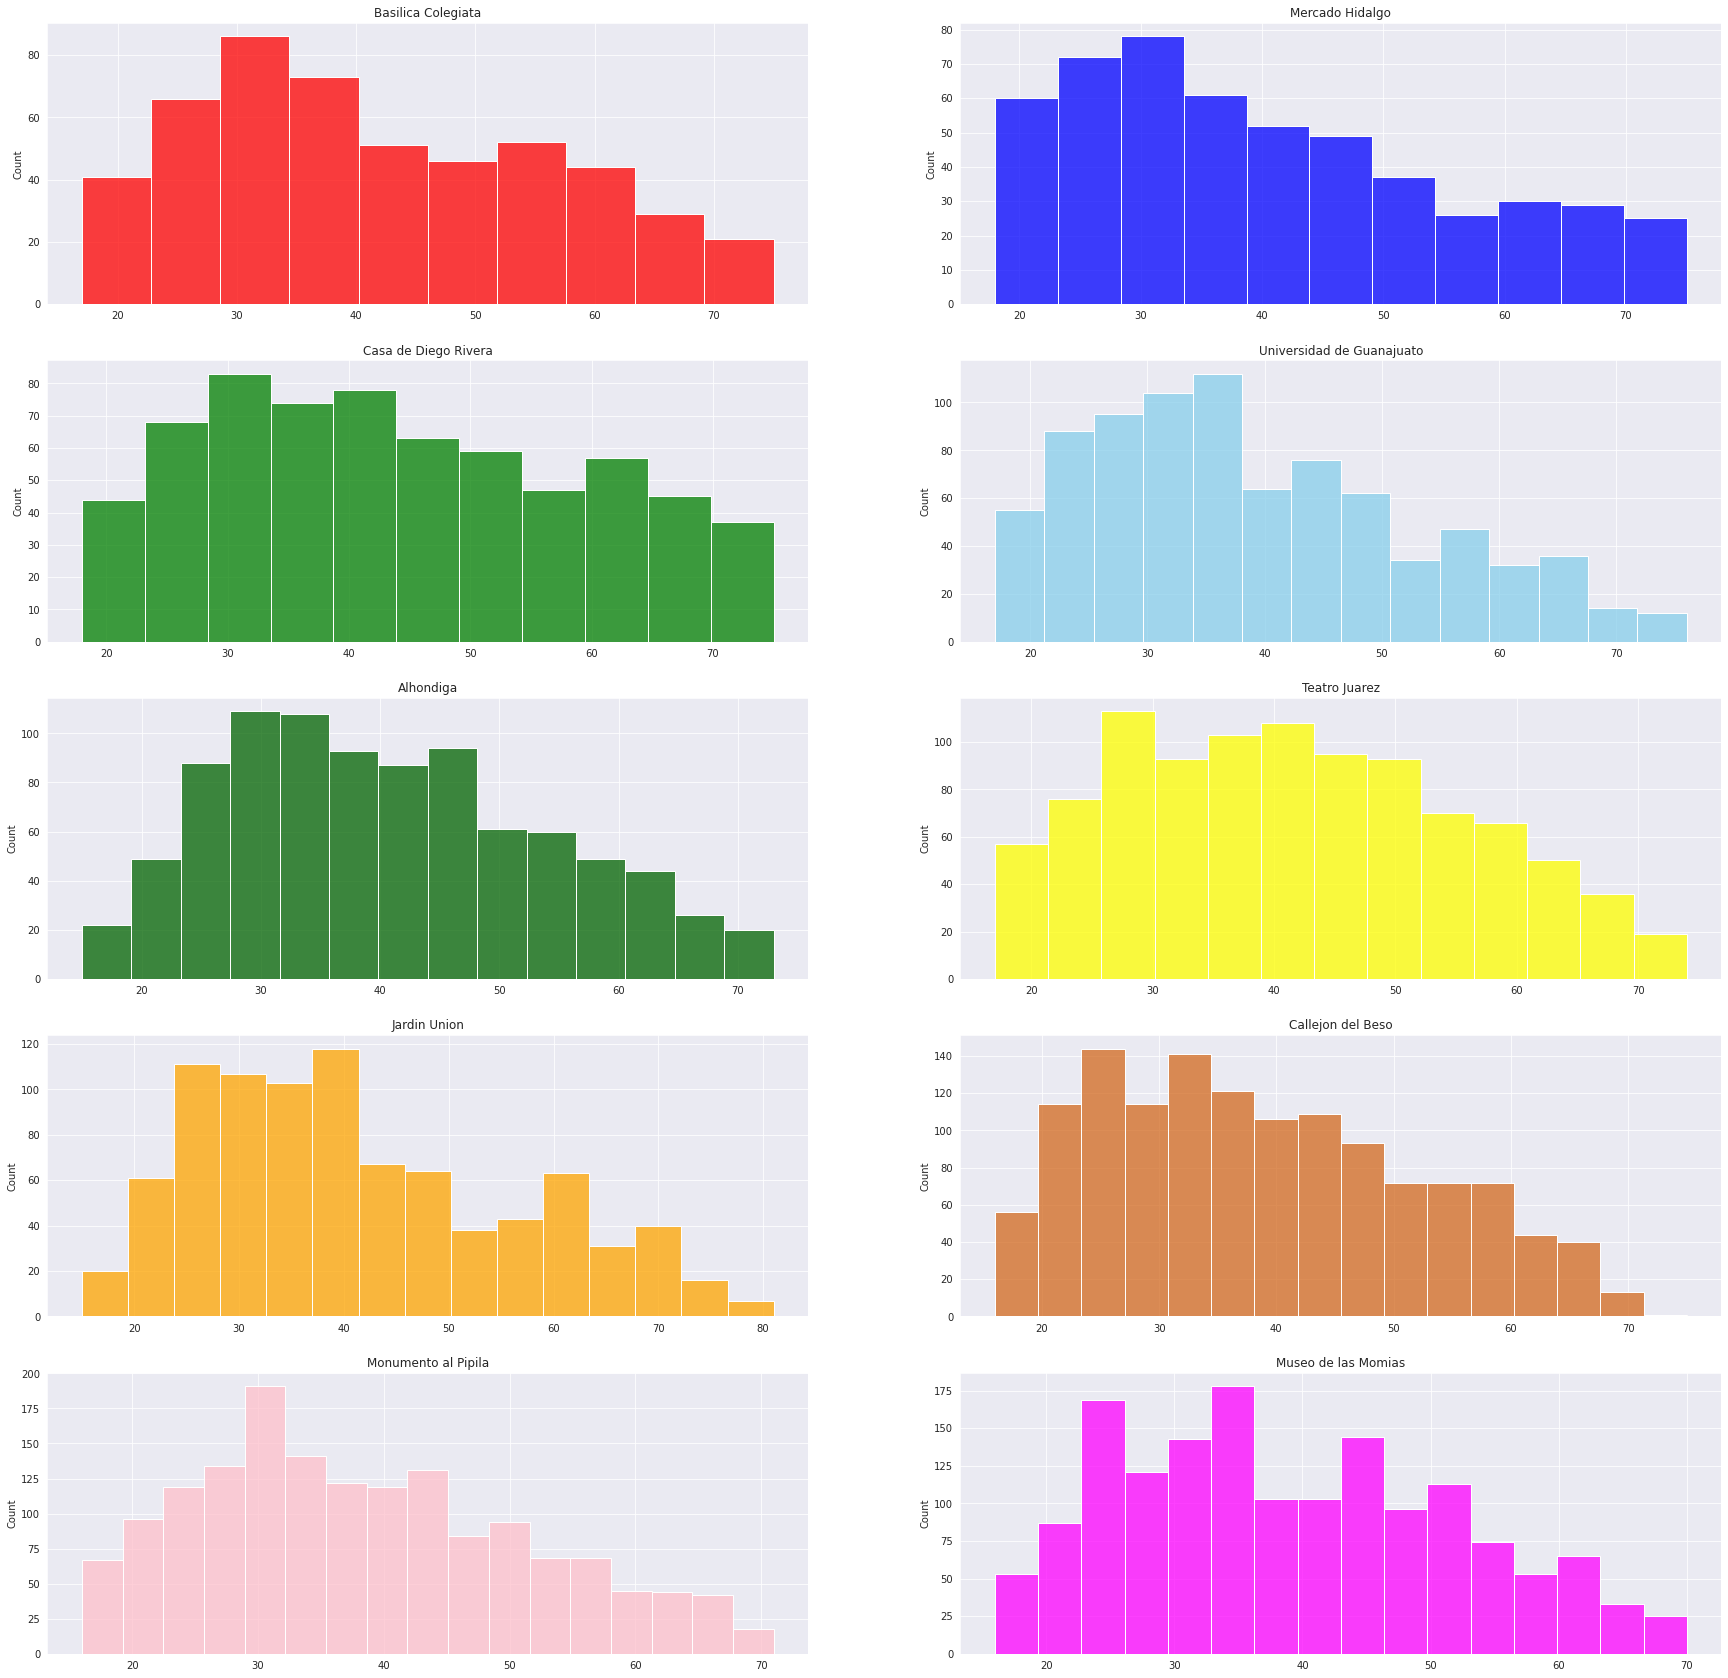

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt

# get figure and axis
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(30, 30))
# linearize axis
axs = [a for ax in axs for a in ax]

colors = ['red', 'blue', 'green', 'skyblue', 'darkgreen', 'yellow', 'orange', 'chocolate', 'pink', 'magenta']
for ds, name, ax, color in zip(datasets, ds_names, axs, colors):
    ages = np.array(list(map(float, ds['Edad'])))
    sns.set_style('darkgrid')
    sns.histplot(ages, ax=ax, color=color).set(title=name)

## Histograma de Cantidad de Personas Nacionales o Internacionales

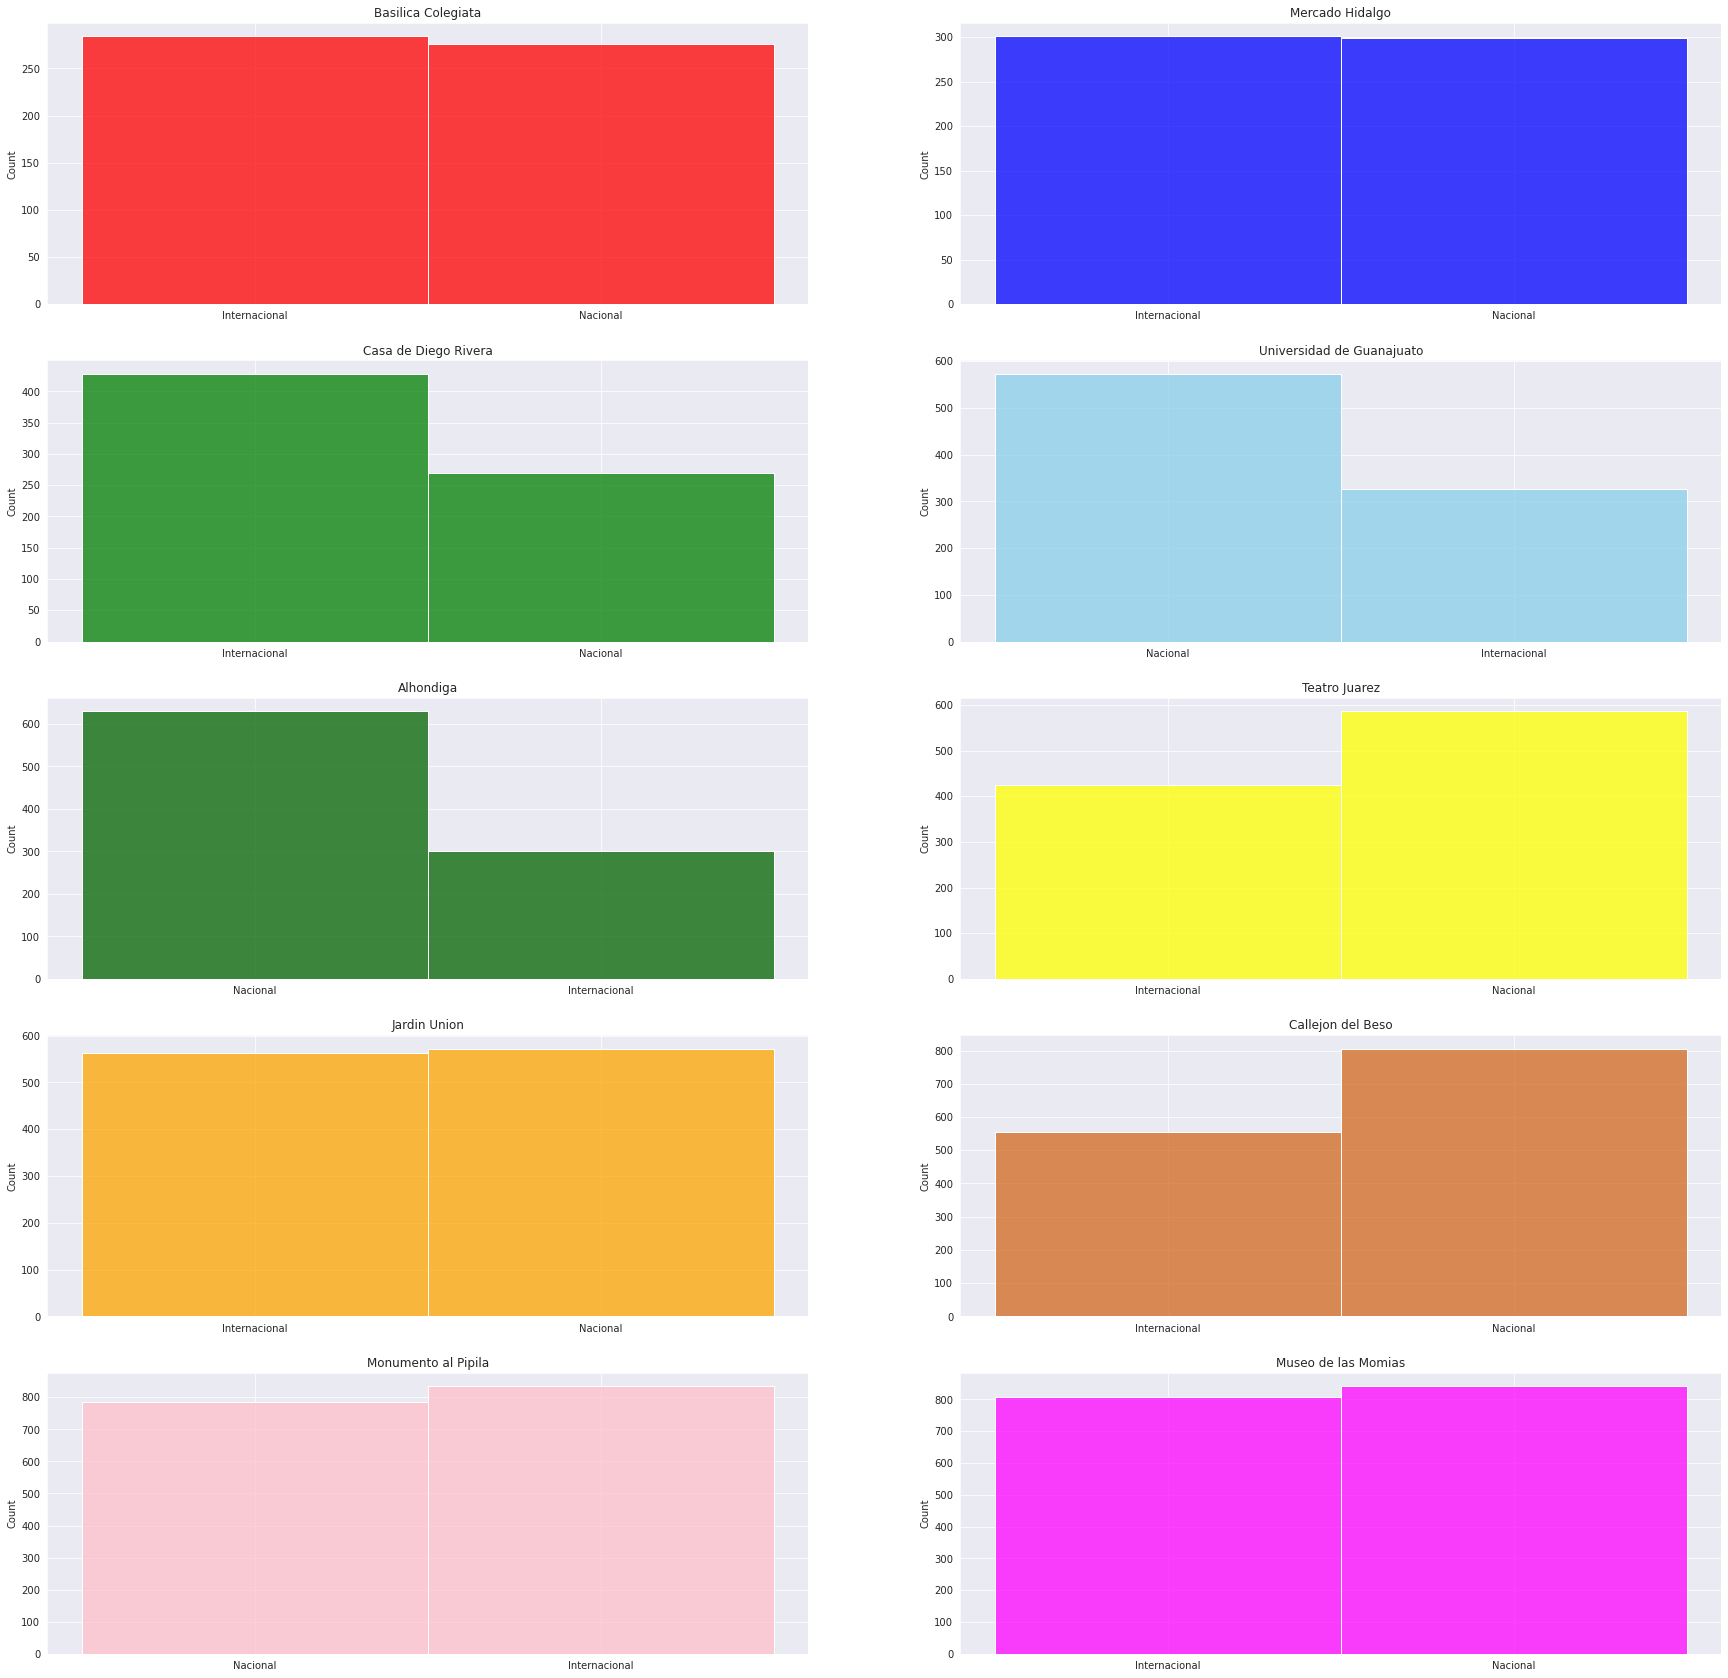

In [132]:
# get figure and axis
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(30, 30))
# linearize axis
axs = [a for ax in axs for a in ax]

colors = ['red', 'blue', 'green', 'skyblue', 'darkgreen', 'yellow', 'orange', 'chocolate', 'pink', 'magenta']
for ds, name, ax, color in zip(datasets, ds_names, axs, colors):
    places = list(ds['Nacional ó Internacional'])
    sns.set_style('darkgrid')
    sns.histplot(places, ax=ax, color=color).set(title=name)

## Histograma de Países

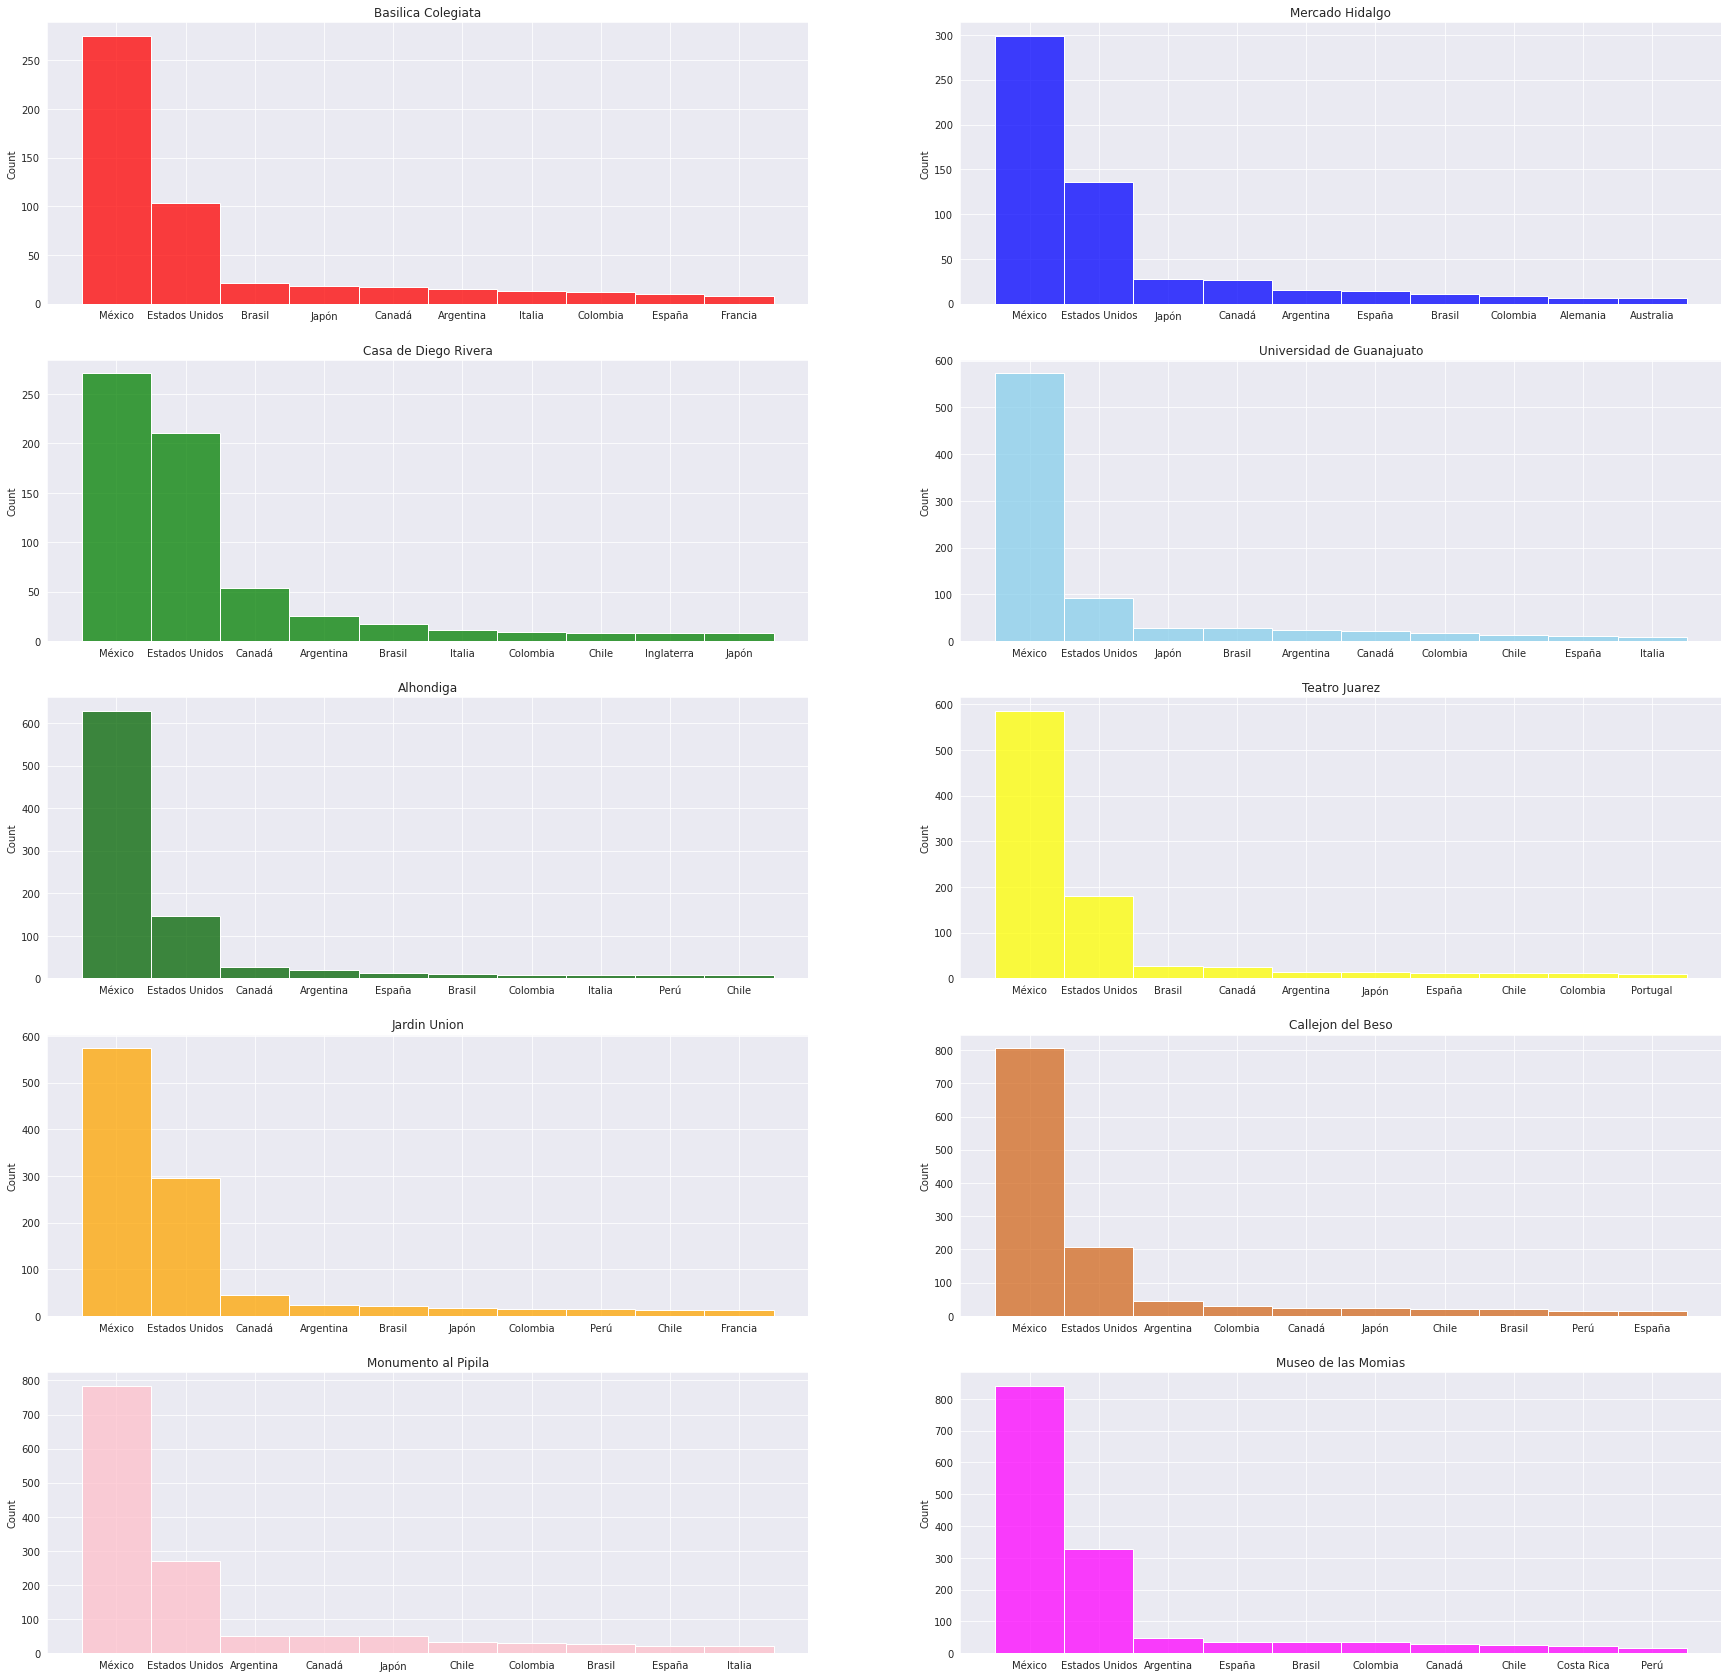

In [131]:
# get figure and axis
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(30, 30))
# linearize axis
axs = [a for ax in axs for a in ax]

colors = ['red', 'blue', 'green', 'skyblue', 'darkgreen', 'yellow', 'orange', 'chocolate', 'pink', 'magenta']
for ds, name, ax, color in zip(datasets, ds_names, axs, colors):
    countries = list(ds['País'])
    countries = FreqDist(countries).most_common(10)
    countries = [word for word, count in countries for _ in range(count)]
    sns.set_style('darkgrid')
    sns.histplot(countries, ax=ax, color=color).set(title=name)

## Histograma por Género

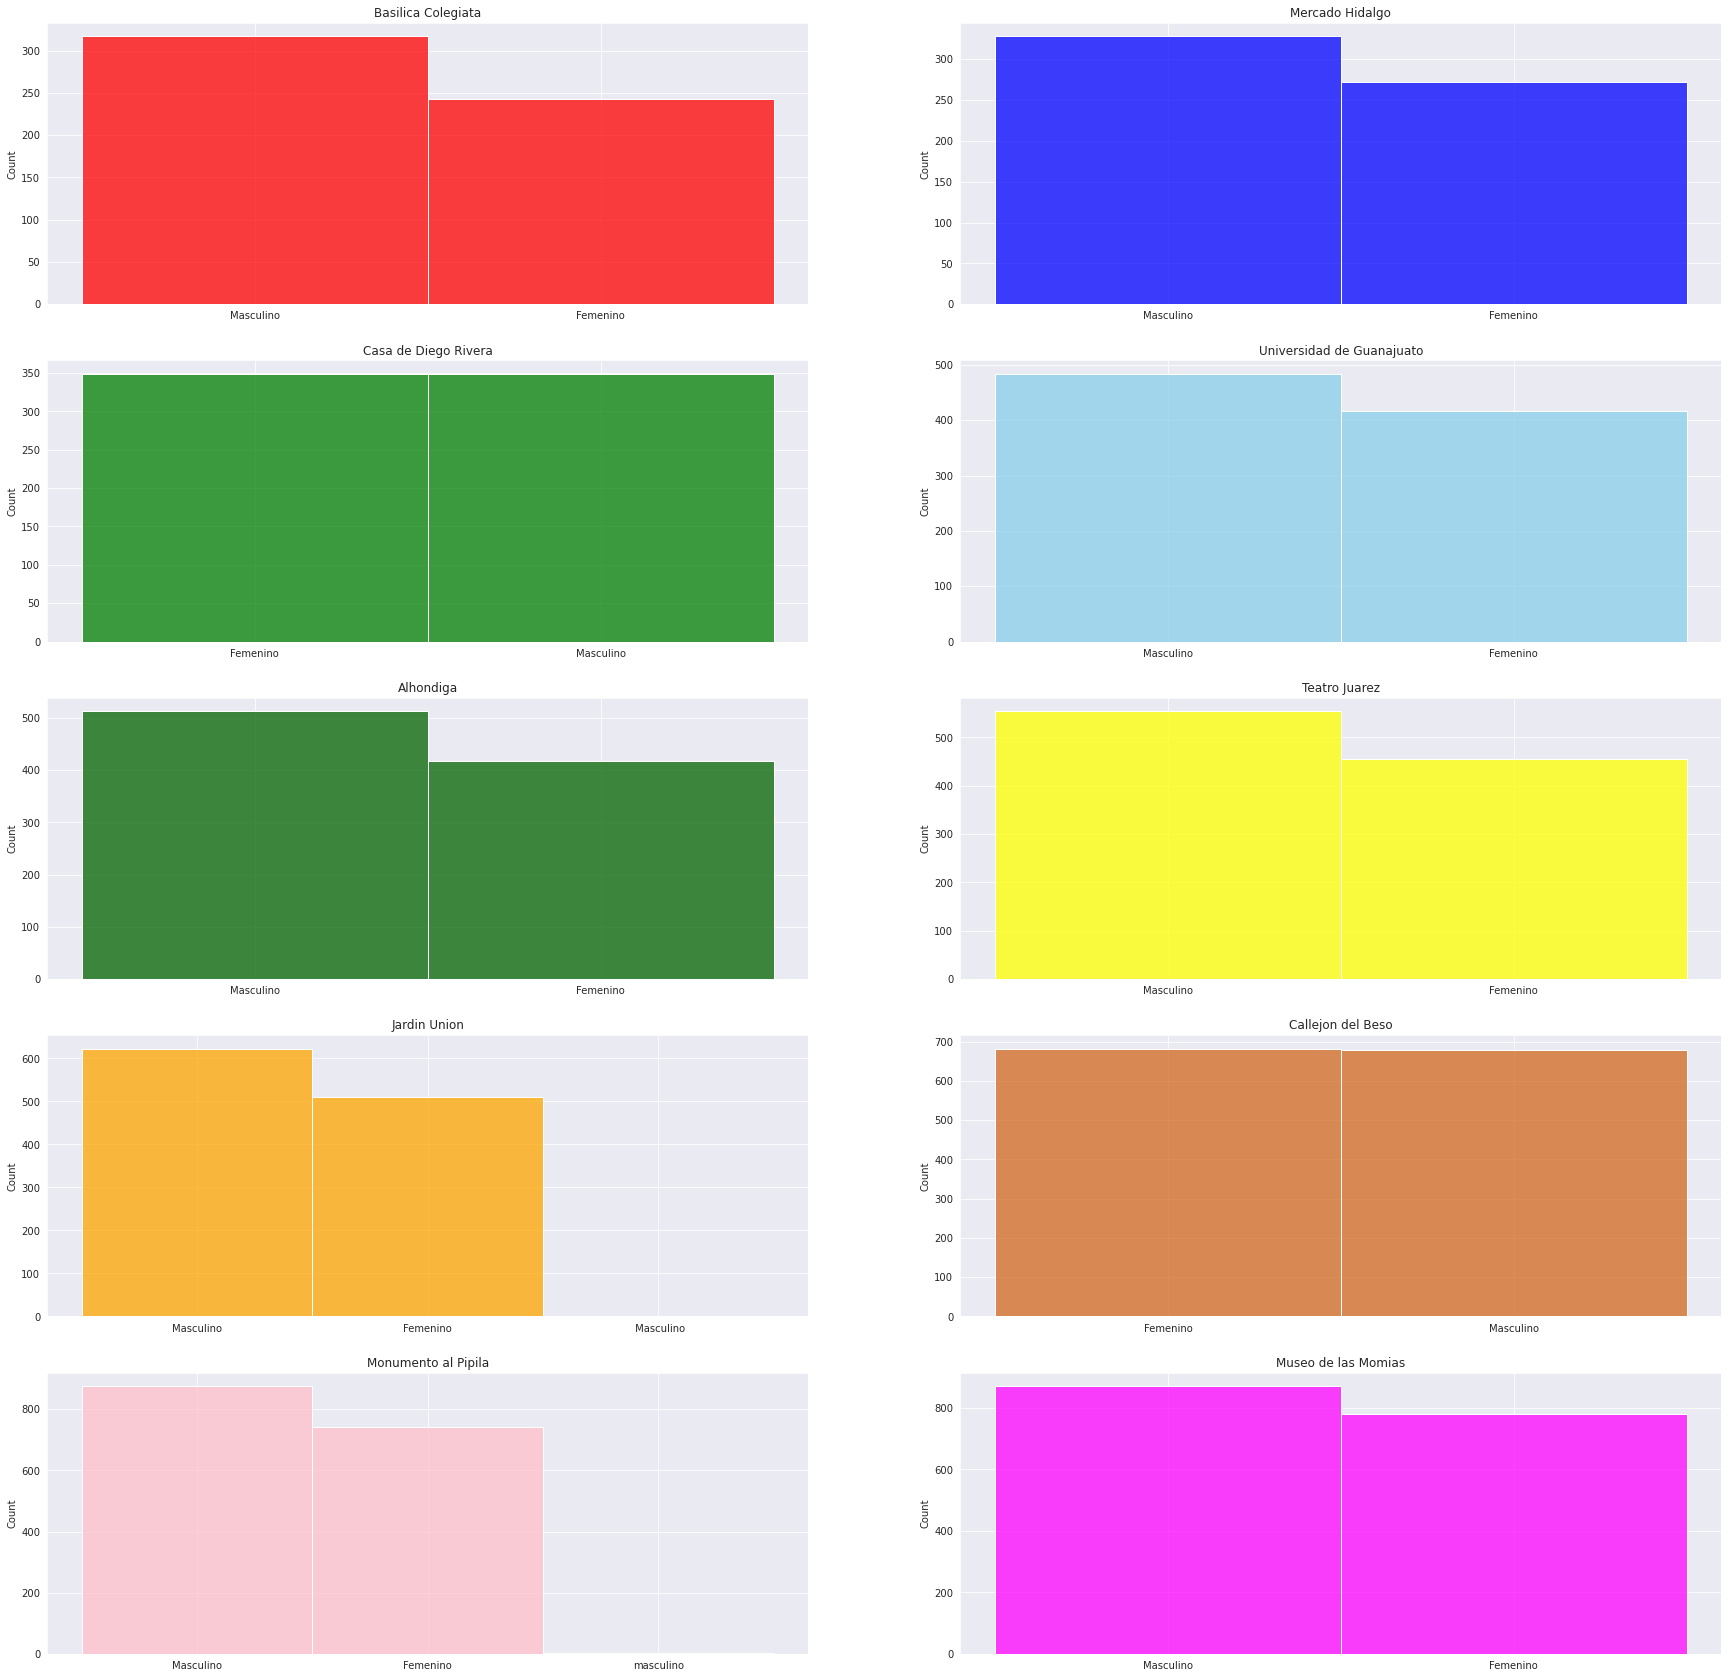

In [136]:
# get figure and axis
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(30, 30))
# linearize axis
axs = [a for ax in axs for a in ax]

colors = ['red', 'blue', 'green', 'skyblue', 'darkgreen', 'yellow', 'orange', 'chocolate', 'pink', 'magenta']
for ds, name, ax, color in zip(datasets, ds_names, axs, colors):
    countries = list(ds['Género'])
    countries = FreqDist(countries).most_common(10)
    countries = [word for word, count in countries for _ in range(count)]
    sns.set_style('darkgrid')
    sns.histplot(countries, ax=ax, color=color).set(title=name)

# 2. Nubes de Palabras

In [139]:
def get_docs(tokenize=False):
    docs_by_place = []
    labels_by_place = []
    for ds in datasets:
        docs = list(ds['Opinión'])
        # get labels
        scores = np.array(list(map(int, ds['Escala'])))
        scores_mat = np.row_stack((scores>=4, scores==3, scores<3))
        labels = 0 * scores_mat[0] + 1*scores_mat[1] + 2 * scores_mat[2]
        # process docs
        docs = process_documents(docs, tokenize=tokenize)
        # append values
        docs_by_place.append(docs)
        labels_by_place.append(labels)
        
    return docs_by_place, labels_by_place

In [140]:
docs_by_place, labels_by_place = get_docs()

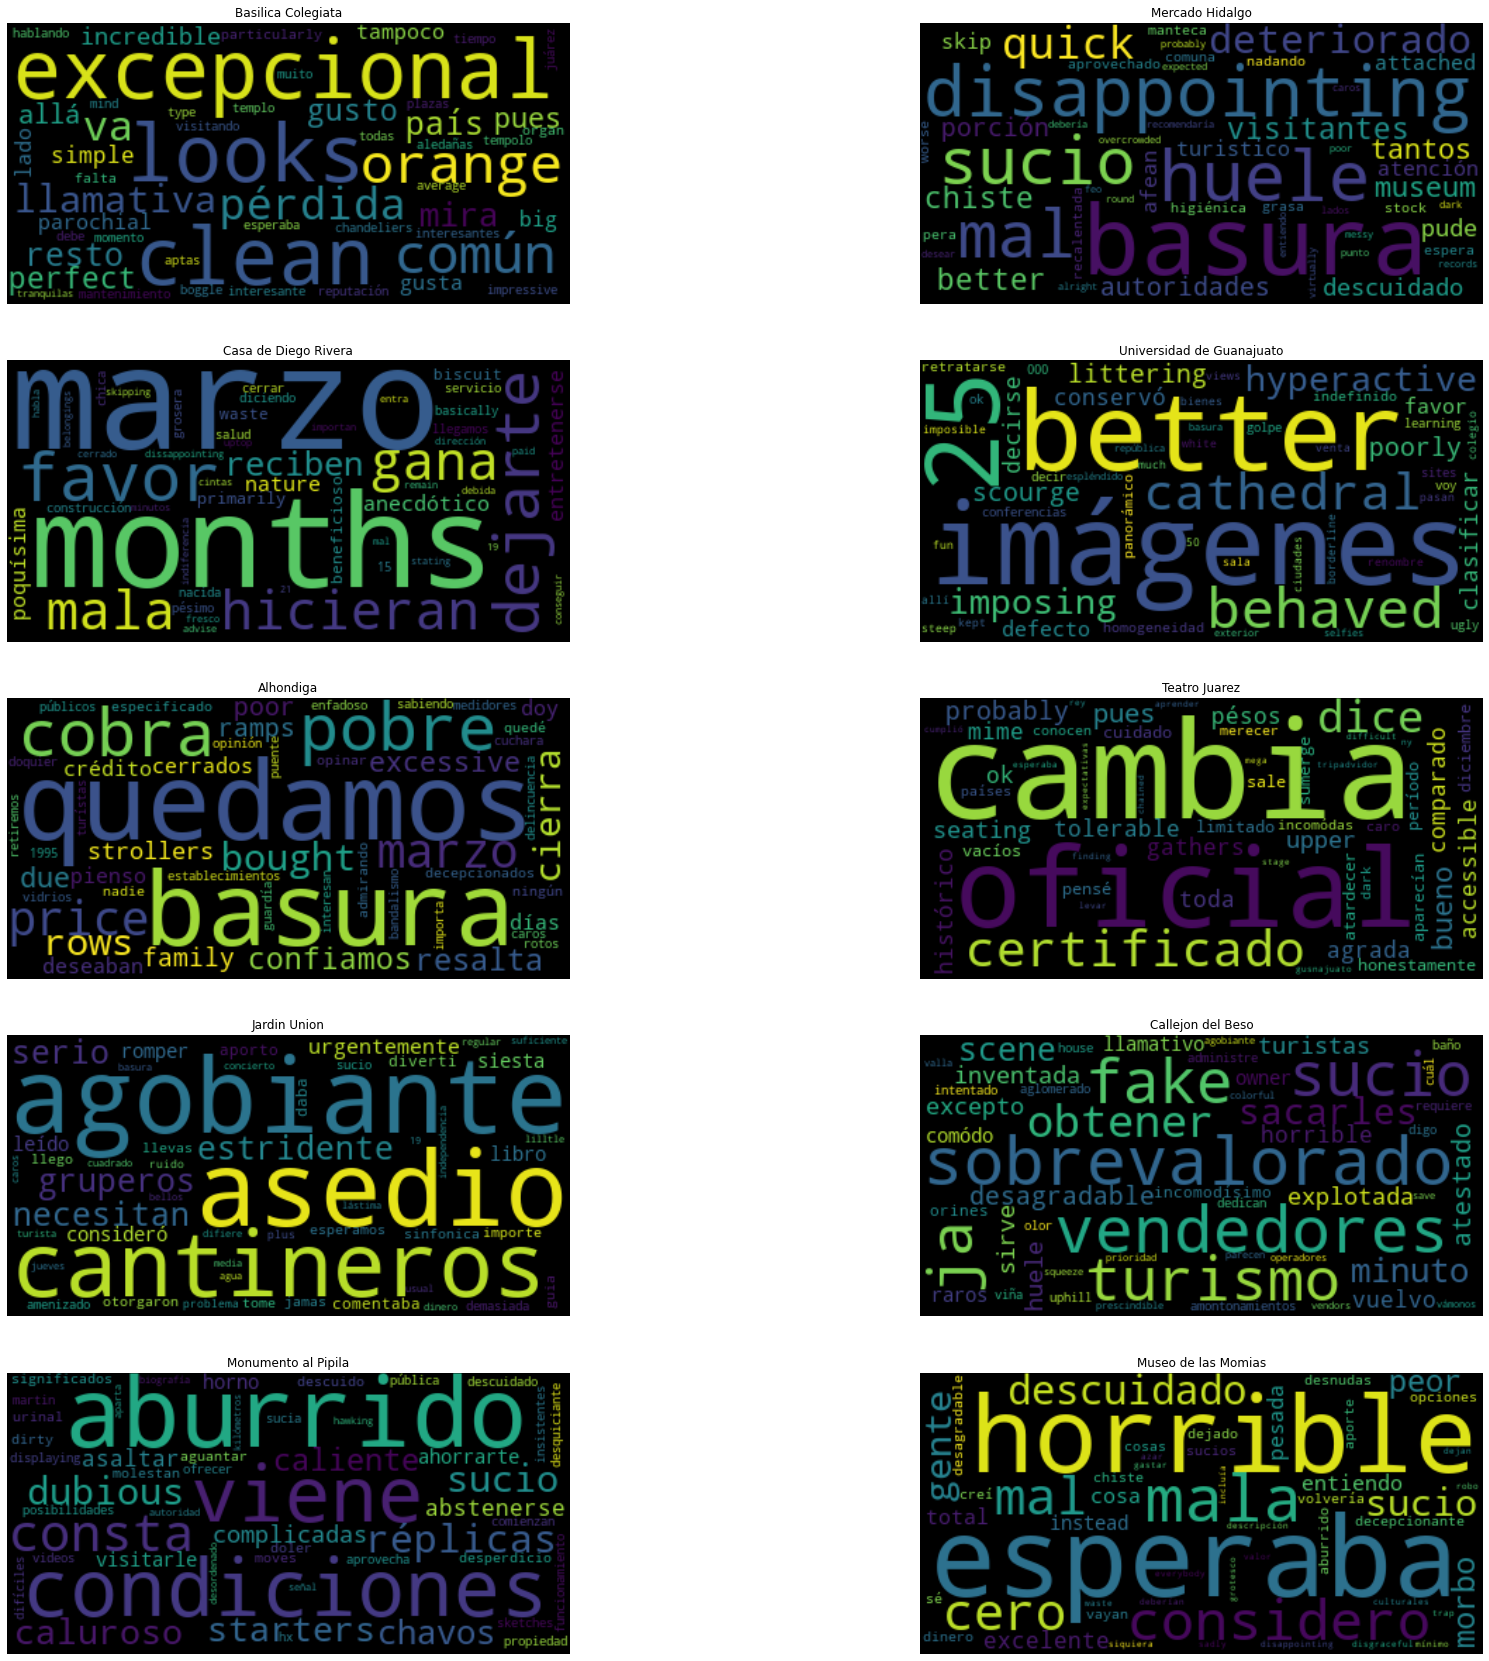

In [133]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# get stopwrds
sw = stopwords.words('spanish') + stopwords.words('english')

# get axis for figures
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(30, 30))
# linearize axis
axs = [a for ax in axs for a in ax]

for docs, labels, name, ax in zip(docs_by_place, labels_by_place, ds_names, axs):
    _, scores, features = get_features(docs, labels, 50, sw=sw)
    
    frequencies = {}
    for (word, weight) in zip(features, scores):
        frequencies[word] = weight
        
    # Generate a word cloud image
    wordcloud = WordCloud().generate_from_frequencies(frequencies)
    # plot 
    ax.imshow(wordcloud, interpolation='bilinear', )
    ax.axis("off")
    ax.set_title(name)
    

# 3 LSA

# 4. Nube de Palabras Negativas

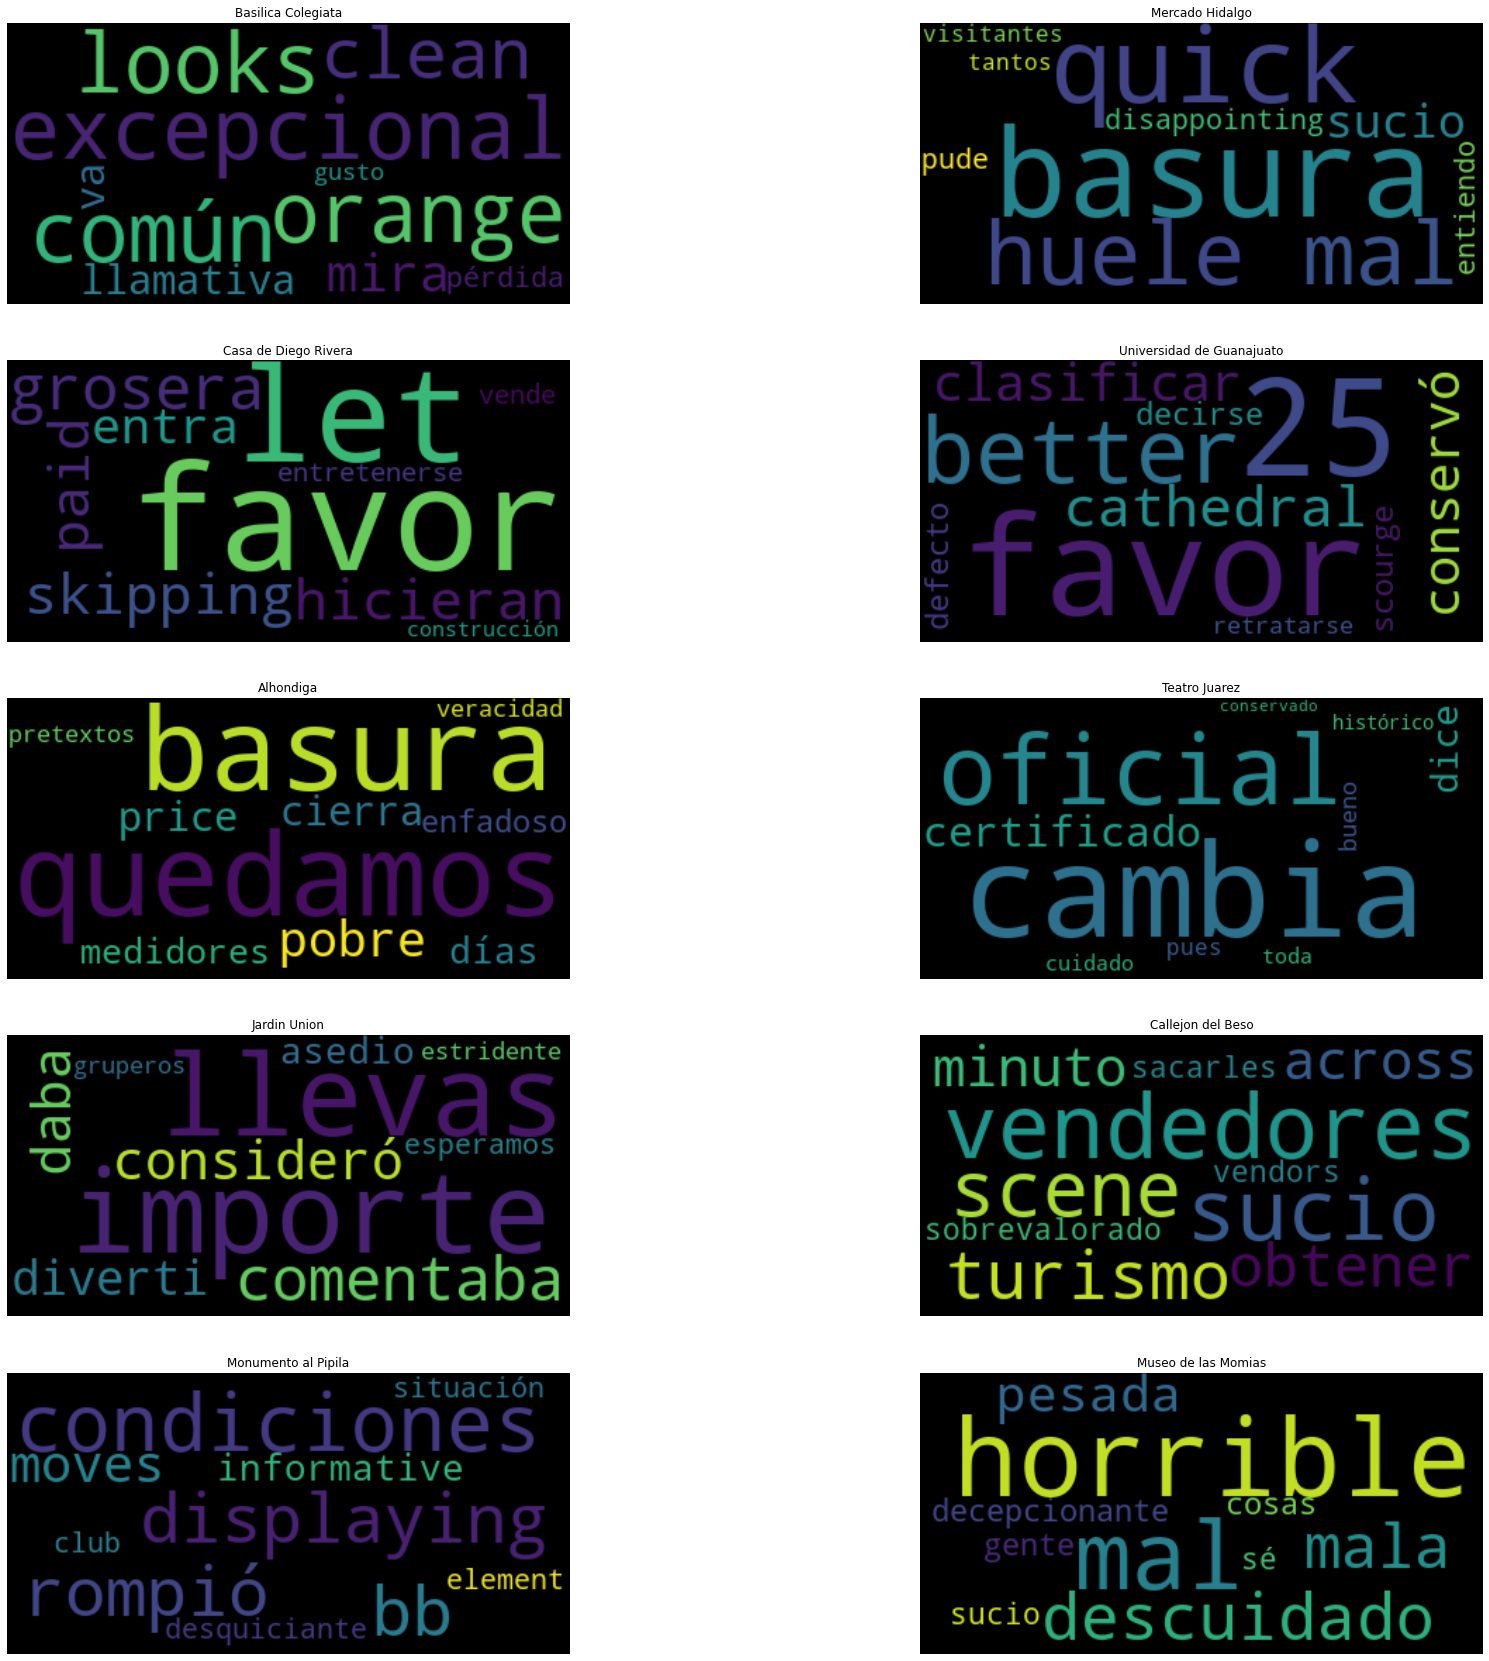

In [193]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# get stopwrds
sw = stopwords.words('spanish') + stopwords.words('english')

# get axis for figures
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(30, 30))
# linearize axis
axs = [a for ax in axs for a in ax]

for docs, labels, name, ax in zip(docs_by_place, labels_by_place, ds_names, axs):
    #vocabulary = get_vocabulary(docs)
    features, scores = get_features_by_hand(docs, labels, 2, 10, sw=sw)
    
    frequencies = {}
    for (word, weight) in zip(features.keys(), scores):
        frequencies[word] = weight
        
    # Generate a word cloud image
    wordcloud = WordCloud().generate_from_frequencies(frequencies)
    # plot 
    ax.imshow(wordcloud, interpolation='bilinear', )
    ax.axis("off")
    ax.set_title(name)
    

# 5. Bag of Words

In [14]:
def get_bows(documents, T, sw=None):
    # bow builders
    bow_b = bow_builder(max_features=T, stop_words=sw)
    bow_bigram_b = bow_builder(max_features=T, ngram_range=(2, 2), stop_words=sw)
    bow_trigram_b = bow_builder(max_features=T, ngram_range=(3, 3), stop_words=sw)
    
    # tfidf transform
    tfidf = TfidfTransformer()
    
    # get bows
    bow = bow_b.fit_transform(documents)
    bow = tfidf.fit_transform(bow)
    
    bow_bi = bow_bigram_b.fit_transform(documents)
    bow_bi = tfidf.fit_transform(bow_bi)
    
    bow_tri = bow_trigram_b.fit_transform(documents)
    bow_tri = tfidf.fit_transform(bow_tri)
    
    # get vocabulary
    voc = bow_b.get_feature_names_out()
    voc_bi = bow_bigram_b.get_feature_names_out()
    voc_tri = bow_trigram_b.get_feature_names_out()
        
    return bow, bow_bi, bow_tri, voc, voc_bi, voc_tri

In [106]:
def tfidf_maxscore(bow, y):
    return np.max(bow.toarray(), axis=0)

def tfidf_avgscore(bow, y):
    return np.sum(bow.toarray(), axis=0)

In [107]:
def get_best_features(bow, voc, k):
    discriminator = SelectKBest(score_func=tfidf_maxscore, k=k)
    new_bow = discriminator.fit_transform(bow, np.zeros(bow.shape[0]))
    features = discriminator.get_feature_names_out(voc)
    return new_bow, features

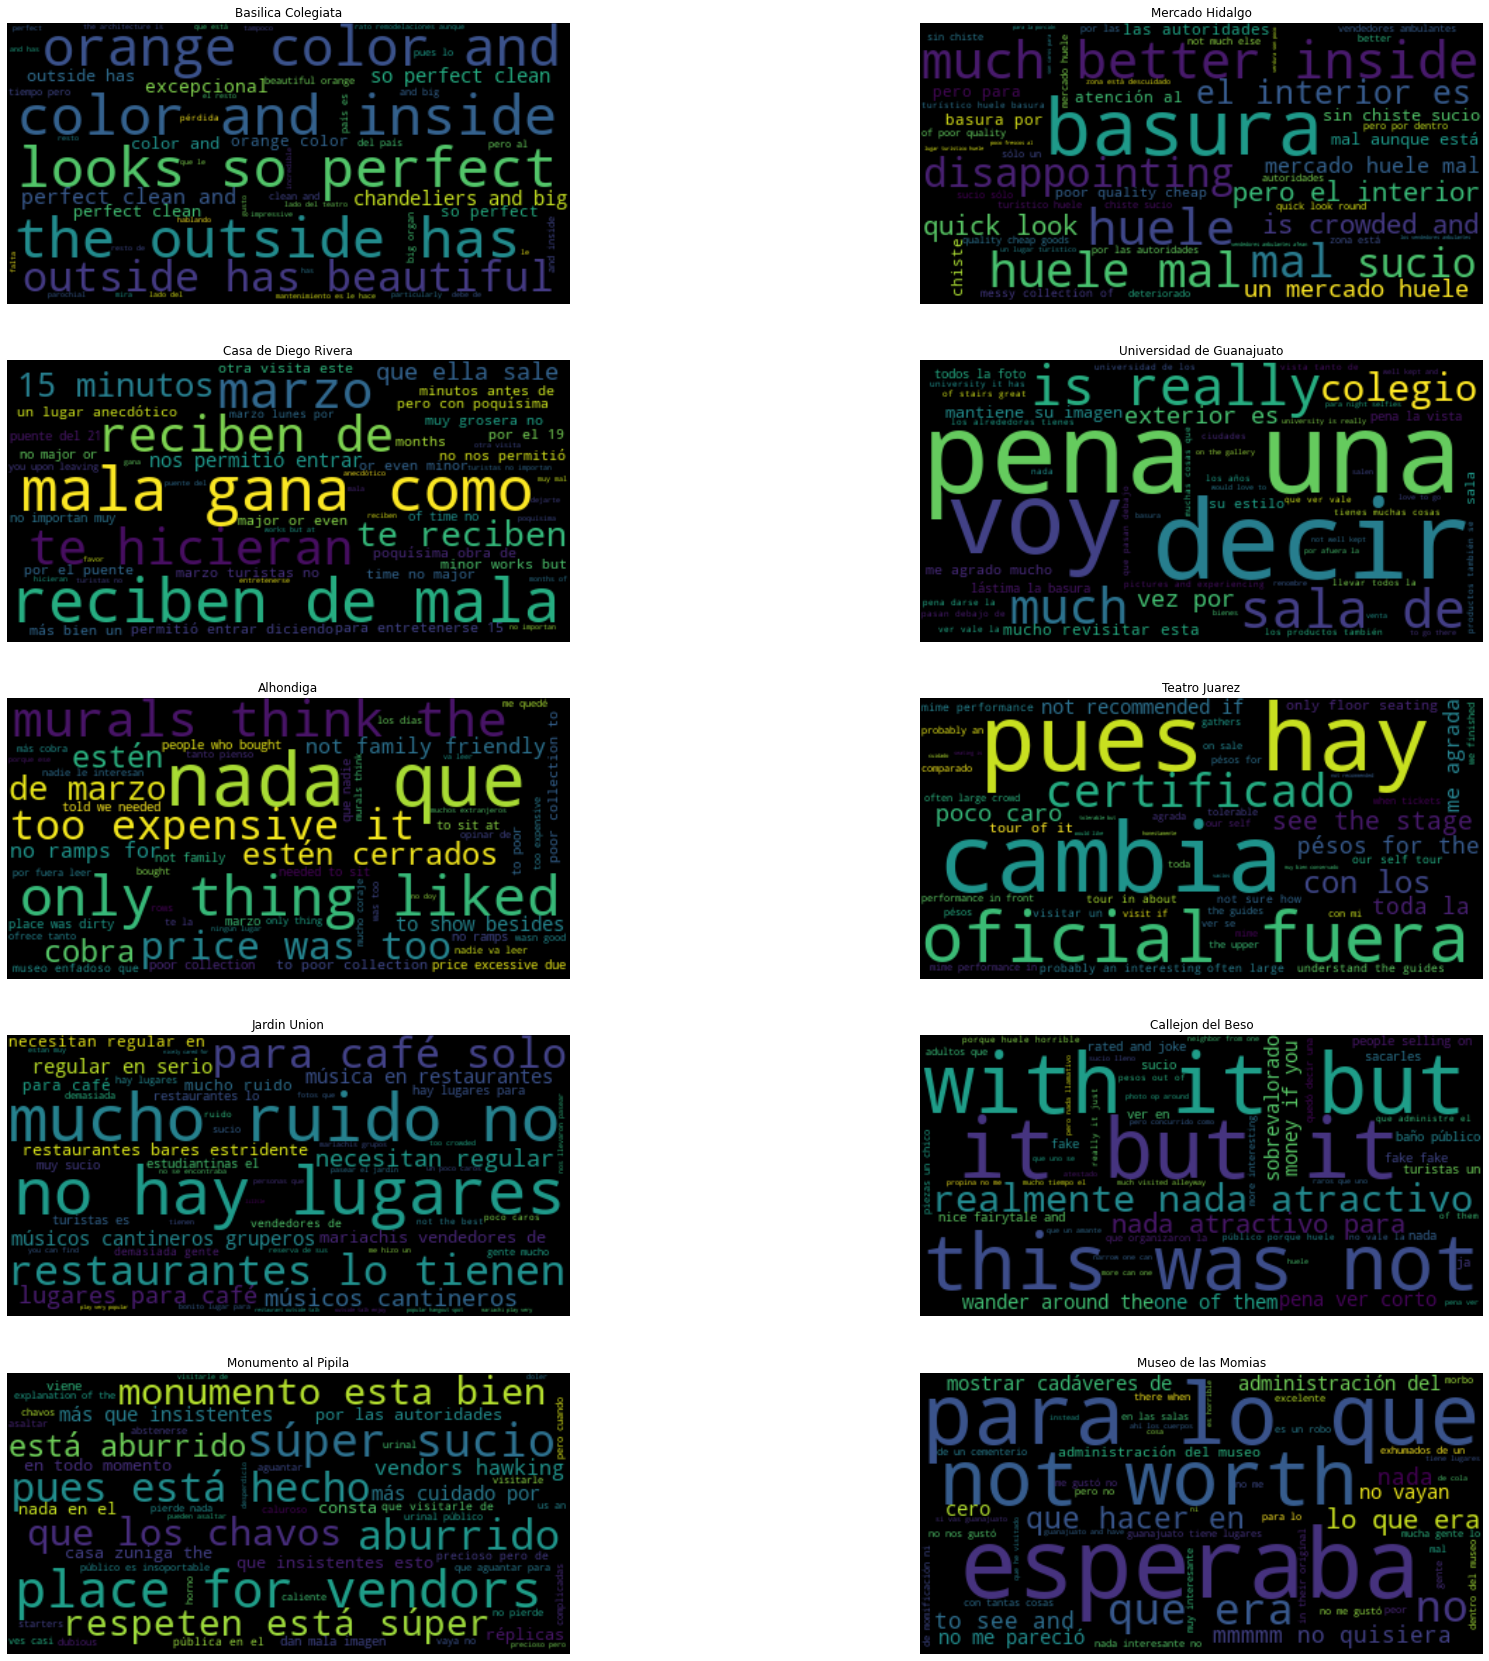

In [123]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from scipy.sparse import hstack 

# get stopwrds
sw = stopwords.words('spanish') + stopwords.words('english')

# get axis for figures
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(30, 30))
# linearize axis
axs = [a for ax in axs for a in ax]


best_combined_feats_by_place = []

for docs, labels, name, ax in zip(docs_by_place, labels_by_place, ds_names, axs):
    # get bows
    bow, bow_bi, bow_tri, voc, voc_bi, voc_tri = get_bows(docs, T=10000)
    bow, voc = get_best_features(bow, voc, 1000)
    bow_bi, voc_bi = get_best_features(bow_bi, voc_bi, 2000)
    bow_tri, voc_tri = get_best_features(bow_tri, voc_tri, 1000)
    
    # append bows
    final_bow = hstack([bow, bow_bi, bow_tri])
    final_features = list(voc) + list(voc_bi)  + list(voc_tri)
    
    # get best 1000 of all features 
    discriminator = SelectKBest(chi2, k=1000)
    reduced_bow = discriminator.fit_transform(final_bow, labels)
    reduced_features = discriminator.get_feature_names_out(final_features)
    
    # get scores
    support = discriminator.get_support(indices=True)
    reduced_scores = discriminator.scores_[support]
    
    # append features to list
    best_combined_feats_by_place.append(reduced_features)
    
    # get indexes of best 50 features 
    indexes = np.flip(np.argsort(reduced_scores))[:50]
    frequencies = {}
    for (word, weight) in zip(reduced_features[indexes], reduced_scores[indexes]):
        frequencies[word] = weight
        
    # Generate a word cloud image
    wordcloud = WordCloud().generate_from_frequencies(frequencies)
    # plot 
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(name)

# 6. Análisis Temporal con Palabras más relevantes

In [163]:
def get_opinion_sorted(ds):
    return list(ds.sort_values(['Fecha'], ascending=True)['Opinión'])

In [194]:
all_docs = [doc for place in docs_by_place for doc in place]
all_labels = [label for place in labels_by_place for label in place]

_, scores, features = get_features(all_docs, all_labels, 10, T=10000, transform=True, sw=sw)

In [195]:
list(features)

['desagradable',
 'descuidado',
 'esperaba',
 'horrible',
 'huele',
 'mal',
 'momias',
 'morbo',
 'peor',
 'sucio']

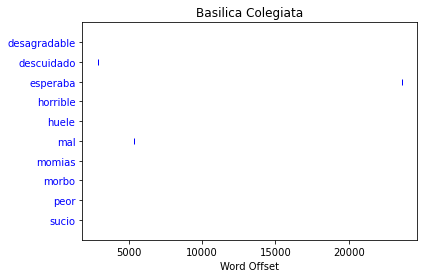

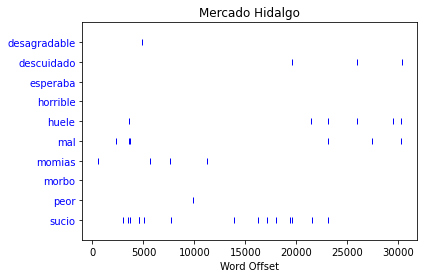

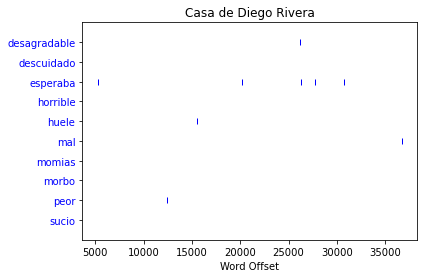

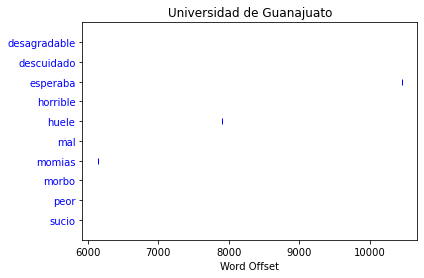

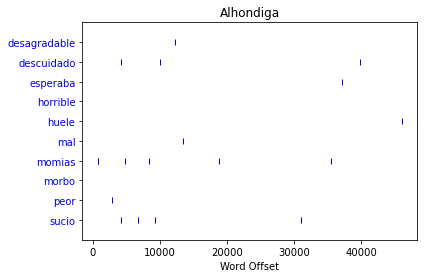

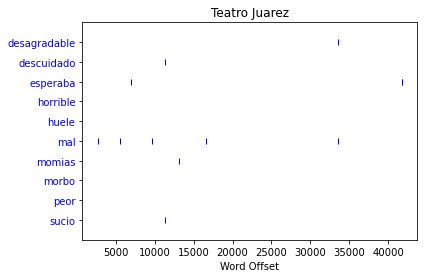

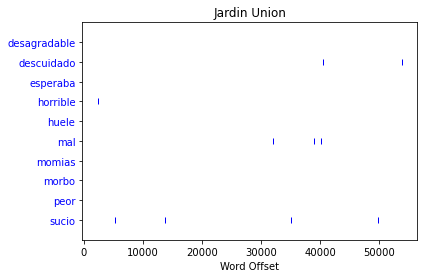

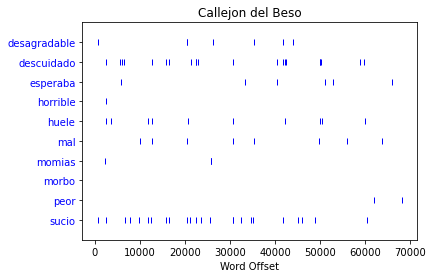

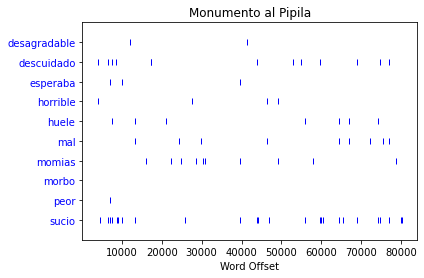

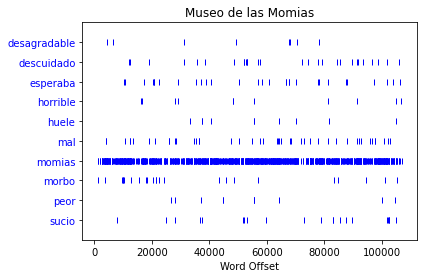

In [196]:
from nltk.draw.dispersion import dispersion_plot
for ds, ds_name in zip(datasets, ds_names):
    opiniones = get_opinion_sorted(ds)
    opiniones = process_documents(opiniones, tokenize=True)
    opiniones = [token for opinion in opiniones for token in opinion]
    opiniones = nltk.Text(opiniones)
    #opiniones.dispersion_plot(list(features), title=ds_name)
    dispersion_plot(opiniones, list(features), ignore_case=True, title=ds_name)

# Pruebas

## pruebas bow de bigramas y trigramas y reduccion con tfidf

In [15]:
bow, bow_bi, bow_tri, voc, voc_bi, voc_tri = get_bows(docs_by_place[0], T=10000)

In [101]:
from scipy.sparse import hstack as col_stack
print(bow.shape[1] + bow_bi.shape[1])
col_stack([bow, bow_bi, bow_tri]).toarray().shape

13853


(560, 23853)

In [104]:
voc

array(['00', '04', '098', ..., 'únicas', 'único', 'únicos'], dtype=object)

In [45]:
bow.shape[0]

560

In [121]:
discriminator = SelectKBest(score_func=tfidf_score, k=1000)
new_bow = discriminator.fit_transform(bow_bi, np.zeros(bow_bi.shape[0]))
features = discriminator.get_feature_names_out(voc_bi)
indexes = discriminator.get_support(indices=True)

In [122]:
discriminator.scores_[indexes]

array([ 0.31970166,  0.66971227,  0.29833908,  0.35009608,  0.30491929,
        0.36810788,  0.33131124,  0.79783555,  0.44885158,  0.29664575,
        0.30372824,  0.30105994,  0.29521302,  0.4379606 ,  0.29130761,
        0.29130761,  0.53342642,  0.54009928,  0.29361546,  0.47117519,
        0.31640754,  0.39021563,  0.2893237 ,  0.50666694,  0.30704762,
        0.50251275,  0.30029246,  0.55320254,  0.29130761,  0.29361546,
        0.29737859,  0.37022783,  0.29764913,  0.30308912,  0.3076084 ,
        0.36822484,  0.29764913,  0.89726556,  0.44200166,  0.57570879,
        1.73762449,  0.57619106,  0.83972175,  0.72456779,  0.41106589,
        0.29185233,  0.36822484,  0.30229956,  0.48070553,  0.29833908,
        0.59923935,  0.32135304,  0.31310423,  0.49375323,  0.48552332,
        0.28878834,  0.3379937 ,  1.57087127,  0.67046504,  0.50722625,
        0.33732034,  0.32604782,  0.30491929,  0.4424449 ,  0.82544413,
        0.57426975,  0.32559634,  0.51961111,  0.35770568,  0.45

In [75]:
new_bow.transform(bow).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## prueba bows

In [ ]:
docs = [['hola', 'mundo'],['documento','hola','numero', '2', 'orale'],['que', 'hola','bonito', 'es', 'lo', 'bonito']]
labels = [1, 0, 0]
vocabulary = get_vocabulary(docs)
bow_b = bow_builder(max_features=10, vocabulary=None, binary=False, tokenizer=dummy, preprocessor=dummy, stop_words=['lo'])
bow = bow_b.fit_transform(docs)

tfidf = TfidfTransformer(use_idf=True, smooth_idf=False)


getFeat = SelectKBest(chi2, k=5)

X = getFeat.fit_transform(bow, labels)

getFeat.get_feature_names_out(bow_b.get_feature_names_out())

In [143]:
np.sum(LabelBinarizer().fit_transform([1, 1, 2, 2, 0, 1, 2, 5])[:,0][:,np.newaxis])

1

In [114]:
bow.toarray()

array([[0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
       [0, 2, 0, 1, 1, 1, 0, 0, 0, 1]])

In [113]:
tfidf.fit_transform(bow).toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.43016528,
        0.        , 0.90275015, 0.        , 0.        , 0.        ],
       [0.48638585, 0.        , 0.48638585, 0.        , 0.23176546,
        0.        , 0.        , 0.48638585, 0.48638585, 0.        ],
       [0.        , 0.74395942, 0.        , 0.37197971, 0.17725032,
        0.37197971, 0.        , 0.        , 0.        , 0.37197971]])

0.9999999966439369

In [55]:
chi2(bow, labels)

(array([2., 4., 2., 2., 2., 2., 2., 2., 2., 2.]),
 array([0.36787944, 0.13533528, 0.36787944, 0.36787944, 0.36787944,
        0.36787944, 0.36787944, 0.36787944, 0.36787944, 0.36787944]))

In [110]:
bow_b.get_feature_names_out()

array(['2', 'bonito', 'documento', 'es', 'hola', 'lo', 'mundo', 'numero',
       'orale', 'que'], dtype=object)

In [91]:
bow.toarray().shape

(3, 10)

In [70]:
getFeat.scores_

array([0.5, 1. , 0.5, 0.5, 2. , 0.5, 2. , 0.5, 0.5, 0.5])

In [71]:
X.toarray()

array([[0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [2, 0, 0, 0, 1]])

In [22]:
bow.toarray()

array([[0, 0, 0, 0, 1],
       [1, 0, 1, 0, 0],
       [0, 2, 0, 1, 0]])

In [204]:
#tf_matrix = np.random.choice([0, 1, 2, 3, 5], (10, 10))
labels = [1, 0, 2, 0, 2, 2, 0, 0, 3, 1]

Nt = len(tf_matrix)
bin_labels = LabelBinarizer().fit_transform(labels)
bin_labels = [bin_labels[:, i][:,np.newaxis] for i in range(bin_labels.shape[1])] 

n_i = np.sum(tf_matrix>0, axis=0)
n_ic = np.array([np.sum((tf_matrix * bin_label)>0, axis=0) for bin_label in bin_labels])
n_c = np.array([np.sum(bin_label) for bin_label in bin_labels])[:, np.newaxis]

labels = np.array(labels)[:, np.newaxis]

n_i1 = np.sum((tf_matrix * labels)>0, axis=0)
n_i0 = np.sum((tf_matrix * (1-labels))>0, axis=0)

n_1 = np.sum(labels, axis=0)
n_0 = Nt - n_1
                 
# compute chi
chi_1 = Nt*(Nt * n_i1 - n_1 * n_i)/(n_1 * n_i * (Nt - n_1) * (Nt - n_i))
chi_0 = Nt*(Nt * n_i0 - n_0 * n_i)/(n_0 * n_i * (Nt - n_0) * (Nt - n_i))

chi_c = Nt*(Nt * n_ic - n_c * n_i)**2/(n_c * n_i * ((Nt - n_c) * (Nt - n_i)))

                 

/tmp/ipykernel_32964/438763848.py:21: RuntimeWarning: divide by zero encountered in true_divide
  chi_1 = Nt*(Nt * n_i1 - n_1 * n_i)/(n_1 * n_i * (Nt - n_1) * (Nt - n_i))
/tmp/ipykernel_32964/438763848.py:22: RuntimeWarning: divide by zero encountered in true_divide
  chi_0 = Nt*(Nt * n_i0 - n_0 * n_i)/(n_0 * n_i * (Nt - n_0) * (Nt - n_i))
/tmp/ipykernel_32964/438763848.py:24: RuntimeWarning: invalid value encountered in true_divide
  chi_c = Nt*(Nt * n_ic - n_c * n_i)**2/(n_c * n_i * ((Nt - n_c) * (Nt - n_i)))


In [174]:
tf_matrix

array([[2, 3, 3, 1, 2, 1, 3, 1, 0, 0],
       [1, 1, 0, 2, 2, 0, 0, 1, 1, 1],
       [0, 0, 0, 3, 3, 3, 0, 3, 1, 0],
       [0, 1, 1, 1, 3, 1, 1, 3, 1, 0],
       [2, 1, 1, 1, 0, 2, 2, 3, 2, 2],
       [2, 2, 1, 3, 3, 2, 3, 2, 3, 3],
       [3, 3, 0, 3, 1, 0, 2, 3, 1, 3],
       [2, 3, 0, 1, 2, 3, 0, 0, 1, 3],
       [2, 0, 0, 1, 3, 3, 3, 3, 2, 0],
       [2, 2, 1, 0, 0, 0, 0, 2, 0, 2]])

In [203]:
chi_c

array([[0.74074074, 0.10416667, 0.07936508, 1.66666667, 0.625     ,
        1.26984127, 0.10416667,        nan,        nan, 0.10416667],
       [4.44444444, 0.625     , 1.07142857, 0.27777778, 0.10416667,
        1.07142857, 0.625     ,        nan,        nan, 1.40625   ],
       [0.47619048, 0.47619048, 2.74376417, 0.47619048, 0.07936508,
        0.02267574, 0.47619048,        nan,        nan, 1.07142857],
       [0.12345679, 0.27777778, 0.47619048, 0.12345679, 1.66666667,
        0.47619048, 0.27777778,        nan,        nan, 0.27777778]])

In [205]:
chi_c

array([[0.74074074, 0.10416667, 0.07936508, 1.66666667, 0.625     ,
        1.26984127, 0.10416667,        nan,        nan, 0.10416667],
       [4.44444444, 0.625     , 1.07142857, 0.27777778, 0.10416667,
        1.07142857, 0.625     ,        nan,        nan, 1.40625   ],
       [0.47619048, 0.47619048, 2.74376417, 0.47619048, 0.07936508,
        0.02267574, 0.47619048,        nan,        nan, 1.07142857],
       [0.12345679, 0.27777778, 0.47619048, 0.12345679, 1.66666667,
        0.47619048, 0.27777778,        nan,        nan, 0.27777778]])

In [196]:
chi_0

array([-0.13888889, -0.15625   ,  0.11904762, -0.20833333, -0.15625   ,
        0.234375  , -0.15625   ,  0.11904762, -0.13888889, -0.13888889])

In [197]:
chi_1

array([ 0.13888889,  0.15625   , -0.11904762,  0.20833333,  0.15625   ,
       -0.234375  ,  0.15625   , -0.11904762,  0.13888889,  0.13888889])

In [181]:
np.array([1, 4, 5]) * np.array([[1],[2], [3]])

array([[ 1,  4,  5],
       [ 2,  8, 10],
       [ 3, 12, 15]])